<a href="https://colab.research.google.com/github/vivek09thakur/Image-Classification-Model/blob/main/Image_Classification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification Using Machine Learing Model**

In this project, We are creating a machine learning classifier to classify and group similar kind of image to the sample images from the given dataset. The model leverages [Keras-API](https://keras.io/) to process the images and [imagenet model](https://www.image-net.org/) to extract features of the images. So It can be classified based on the [cosine similarity](https://www.sciencedirect.com/topics/computer-science/cosine-similarity#:~:text=Cosine%20similarity%20measures%20the%20similarity,document%20similarity%20in%20text%20analysis) of sample image and rest of image in dataset.

- **Ignore Warnigs**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

*  **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Requriements**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from shutil import copyfile

### **Exploring Dataset**

In [ ]:
def ExploreDataset(dataset_path,dataset_ListPath):
    os.chdir(dataset_path)
    row , column = 3 , 3
    fig = plt.figure(figsize=(15, 10))
    for i in range(len(dataset_ListPath)):
        img = plt.imread(dataset_ListPath[i])
        fig.add_subplot(row, column, i+1)
        plt.imshow(img)

**Images in given dataset**

In [ ]:
Dataset = "/content/drive/MyDrive/Colab Notebooks/Dataset/ImgDataset/TrainData"
DatasetImageList = os.listdir(Dataset)

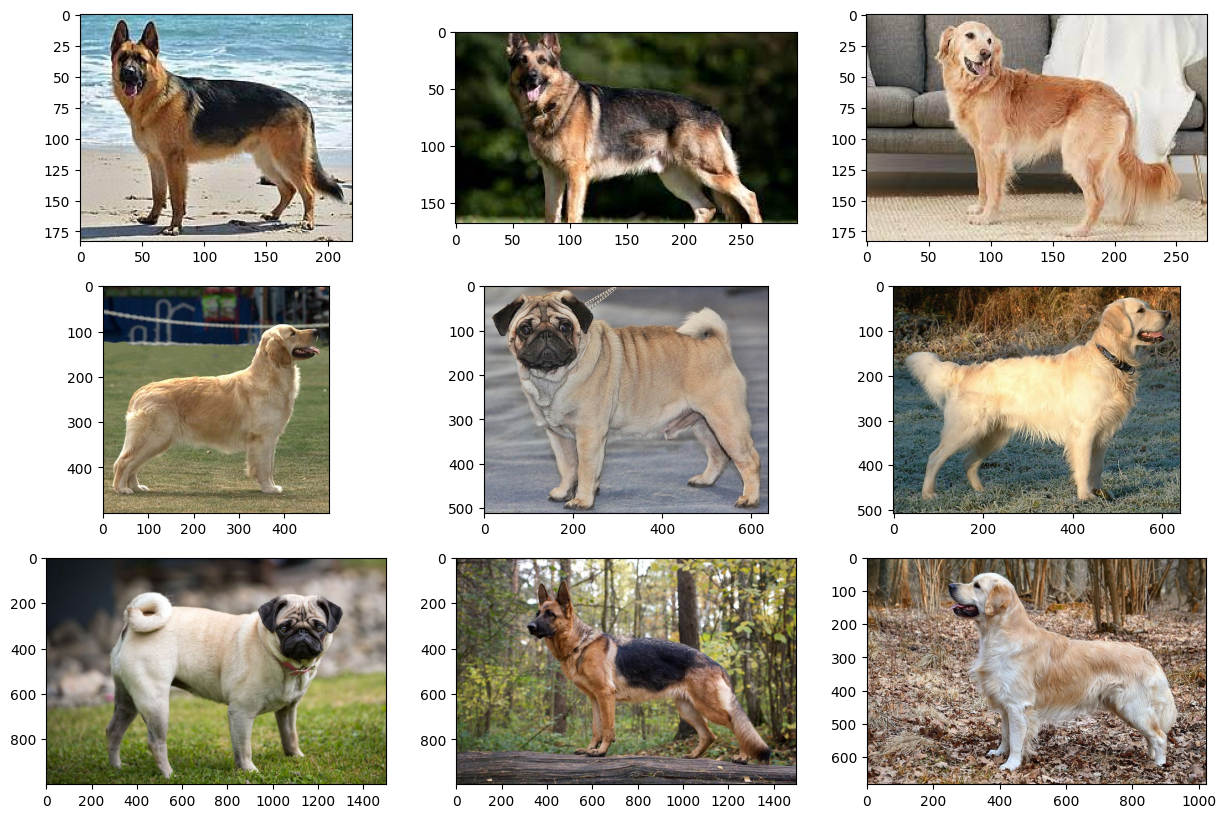

In [ ]:
ExploreDataset(dataset_path=Dataset,dataset_ListPath=DatasetImageList)

> As we can see in dataset we have image of multiple dog breed such as germen sheperd,pug and golden retriver

- **Loading and Processing The Images**

In [ ]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

- **Extracting Image Feature**

In [ ]:
def extract_features(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    features = model.predict(img_array)
    return features.flatten()

- **Calculating Cosine Similarity**

In [ ]:
def get_cosine_similarity(feature1, feature2):
    similarity = cosine_similarity([feature1], [feature2])
    return similarity[0][0]

- **Finding All The Similar Images To The Given Sample**

In [ ]:
def find_and_group_similar_images(sample_image_folder,
                                  dataset_folder,
                                  threshold=0.8,
                                  output_folder="ClassifiedImages"):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False)

    for sample_image_filename in os.listdir(sample_image_folder):
        if sample_image_filename.endswith(('.jpg', '.jpeg', '.png')):
            sample_image_path = os.path.join(sample_image_folder,
                                             sample_image_filename)

            # Create a folder for each sample image
            sample_output_folder = os.path.join(
                output_folder,
                os.path.splitext(sample_image_filename)[0])

            if not os.path.exists(sample_output_folder):
                os.makedirs(sample_output_folder)

            # Extract features for the sample image
            sample_features = extract_features(sample_image_path,
                                               base_model)

            for dataset_image_filename in os.listdir(dataset_folder):
                if dataset_image_filename.endswith(('.jpg',
                                                    '.jpeg',
                                                    '.png')):

                    dataset_image_path = os.path.join(dataset_folder,
                                            dataset_image_filename)

                    current_features = extract_features(
                        dataset_image_path,
                        base_model)

                    # Calculate cosine similarity
                    similarity = get_cosine_similarity(sample_features,
                                                       current_features)

                    if similarity > threshold:
                        output_path = os.path.join(sample_output_folder,
                                                   dataset_image_filename)
                        copyfile(dataset_image_path, output_path)
                        print(f'''
                        Similar Img {sample_image_filename}:
                        {dataset_image_filename}''')

                        print(f"Similarity: {similarity:.2f})")

### **Testing The Classifier**

In [ ]:
SampleImgFolder = "/content/drive/MyDrive/Colab Notebooks/Dataset/ImgDataset/SampleImg"
similarity_threshold = 0.5
output_folder = "/content/ClassifiedImages"

- **Image as Sample Data**

In [ ]:
SampleImage = os.listdir(SampleImgFolder)

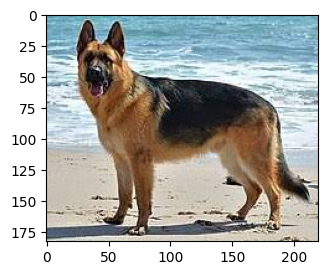

In [ ]:
ExploreDataset(SampleImgFolder,SampleImage)

As for sample we have the image of this cool guy from the dataset.
>**NOTE :**
The sample image should be placed in a seperate folder (i.g:`path/to/dataset/sampleImg`).


In [ ]:
find_and_group_similar_images(
    SampleImgFolder,
    Dataset,
    similarity_threshold,
    output_folder
)

1/1 [==============================] - 0s 21ms/step

                        Similar Img sample_img1.jpg:
                        sample_img1.jpg
Similarity: 1.00)
1/1 [==============================] - 0s 17ms/step

                        Similar Img sample_img1.jpg:
                        sample_img3.jpg
Similarity: 0.56)
1/1 [==============================] - 0s 25ms/step

                        Similar Img sample_img1.jpg:
                        sample_img2.jpg
Similarity: 0.61)
1/1 [==============================] - 0s 33ms/step


**NOTE :**
> The classified images will found in a folder under the `ClassifiedImages` directory (I.g : If the sample image named as : `sample_img1` the the grouped images can be found in `path/to/ClassifiedImages/sample_img1`)

### **Grouped Images After Classification**

In [ ]:
OutputDirList = os.listdir("/content/ClassifiedImages/sample_img1")

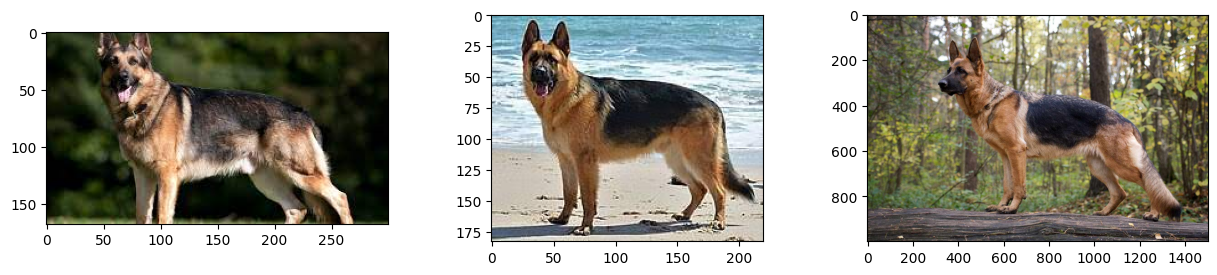

In [ ]:
ExploreDataset("/content/ClassifiedImages/sample_img1",OutputDirList)

## **Conclusion**
As you can see we have successfully extracted the features and classifed all the images of the germen sheperd based on the cosine similarity of sample image to the images of the dataset.

### **References**

1. **[Dataset Used](https://drive.google.com/drive/folders/1-1z61aeaxTmLo4hj8RL491yS36UVES2_?usp=drive_link)** - Contains all the dataset including `TrainData/` (contains all the images of dogs) and `sampleImg/` (contains a single img of the germen sheperd)

2. **[Training Data](https://drive.google.com/drive/folders/1JIEuyIQm7M45sz9ZnunbeFo8qoPJUyB5?usp=drive_link)** - Contains image of dogs of all breed (germen shepred,pug and golden retriver)

3. **[SampleImg](https://drive.google.com/drive/folders/16iVIgZIUNJL9w1J-VFtTiuibmee5OeeN?usp=drive_link)** - Contains a single image of the handsome guy we used as a sample.